##### Загружаем файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(f'https://drive.google.com/uc?id={"1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1"}')

In [3]:
# смотрим что внутри
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пустые значения отсутствуют

In [4]:
# проверяем данные на наличие дубликатов
df[df.duplicated() == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


В датафрейме обнаружено 3008 дублирующихся строк. По заданию, датафрейм создан на основе опроса сотрудников, скорее всего, одинаковые ответы - это ошибка ввода данных.

In [5]:
# удаляем дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


Получаем 11991 не пустых строк вместо 14999   
Данные подготовлены для анализа

##### Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [6]:
# основные статистики для количественных столбцов
df.iloc[:,:5].describe().round(2).loc[['mean', '50%', 'min', 'max', 'std',]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
mean,0.63,0.72,3.80,200.47,3.36
50%,0.66,0.72,4.00,200.00,3.00
min,0.09,0.36,2.00,96.00,2.00
max,1.00,1.00,7.00,310.00,10.00
std,0.24,0.17,1.16,48.73,1.33


Первоначальный анализ показывает, что чем сотрудник дольше работает в компании, тем больше он доволен работой и больше времени находится на рабочем месте.)   
Здесь есть еще один фактор, это оплата, который влияет на уровень удовлетворенности. Он здесь не показан. 

In [7]:
# Основные статистики для категориальных столбцов
df.iloc[:,5:10].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


Видим, что оснавная часть опрошенных сотрудников работает в депортаменте продаж с низким уровнем заработной платы

###### Расчет по отдельности статистик

In [28]:
# среднее значение
df.iloc[:,:5].mean().round(2)

satisfaction_level        0.63
last_evaluation           0.72
number_project            3.80
average_montly_hours    200.47
time_spend_company        3.36
dtype: float64

In [29]:
# медиана
df.iloc[:,:5].median()

satisfaction_level        0.66
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [30]:
# мода
df.iloc[:,5:10].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


In [51]:
# минимум
df.iloc[:,:5].min()

satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64

In [31]:
# максимум
df.iloc[:,:5].max()

satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64

In [32]:
# стандартное отклонение
df.iloc[:,:5].std().round(2)

satisfaction_level       0.24
last_evaluation          0.17
number_project           1.16
average_montly_hours    48.73
time_spend_company       1.33
dtype: float64

##### Рассчитаем и визуализируем корреляционную матрицу для количественных переменных. Определим две самые скоррелированные и две наименее скоррелированные переменные

In [8]:
# импортируем библиотеки
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# считаем корреляционную матрицу
df_corr = df.iloc[:, :5].corr().round(3)
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000,0.095,-0.133,-0.006,-0.153
last_evaluation,0.095,1.000,0.270,0.265,0.097
number_project,-0.133,0.270,1.000,0.332,0.189
average_montly_hours,-0.006,0.265,0.332,1.000,0.103
time_spend_company,-0.153,0.097,0.189,0.103,1.000


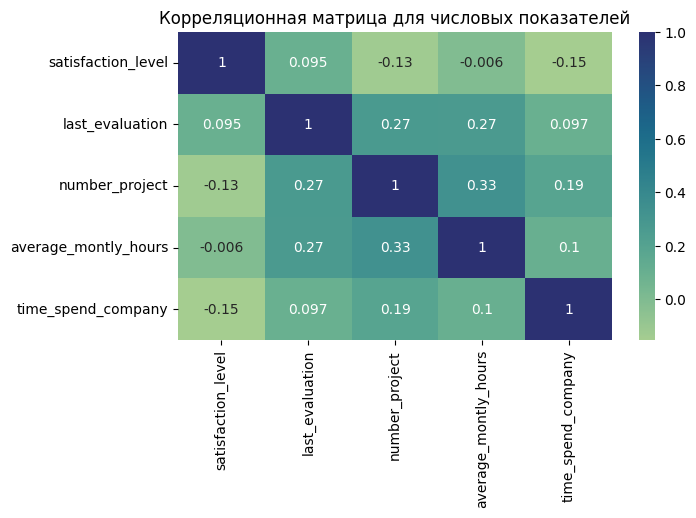

In [10]:
# визуализируем корреляционную матрицу
plt.figure(figsize=(7, 4))
sns.heatmap(df_corr, annot=True, cmap='crest')
plt.title('Корреляционная матрица для числовых показателей')
plt.show()

Наиболее скореллированные переменные: average_montly_hours и number_project: 0.33   
Наименее скоррелированные переменные average_montly_hours и satisfaction_level: -0.006

Чем больше сотрудник проводит время на рабочем месте, тем больше у него проектов в работе. Или скорее наоборот, чем больше сотрудник берет на себя проектов, тем больше ему приходится находиться на рабочем месте.   
Совершеннно не скореллированы количество рабочих часов и уровень удовлетворенности работой. Здесь можно по разному смотреть на эти данные. Кто-то проводит больше времени, потому что нравится работа, а кто-то просто не успевает делать работу в срок.

##### Рассчитаем сколько сотрудников работает в каждом департаменте

In [11]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [80]:
# визуализиреем полученные значения
import plotly.express as px

df_piple = df['department'].value_counts()

fig = px.bar(df_piple,
             x='department',
             title='Гистограмма распределения сотрудников по департаментам',
             text=df_piple.values)

fig.update_layout(
    width=900,
    height=400
)
fig.update_xaxes(title_text='Отделы')
fig.update_yaxes(title_text='Количество сотрудников')

fig.show()

##### Покажем распределение сотрудников по зарплатам

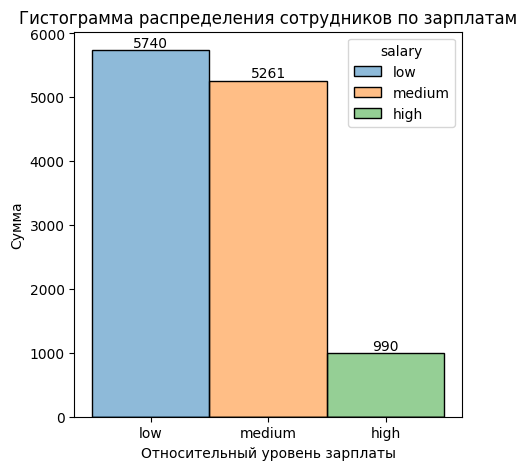

In [33]:
plt.figure(figsize=(5, 5))
df_salary = sns.histplot(data=df, x='salary', hue='salary')

plt.title('Гистограмма распределения сотрудников по зарплатам')
plt.xlabel('Относительный уровень зарплаты')
plt.ylabel('Сумма')

for p in df_salary.patches:
    if p.get_height() > 0:
        df_salary.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##### Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [34]:
df_salary = df.pivot_table(index='department', columns='salary', aggfunc='size')
df_salary

salary,high,low,medium
department,,,
IT,71,476,429
RandD,47,322,325
accounting,63,296,262
hr,38,296,267
management,128,139,169
marketing,62,310,301
product_mng,52,343,291
sales,237,1553,1449
support,126,867,828


<Figure size 900x600 with 0 Axes>

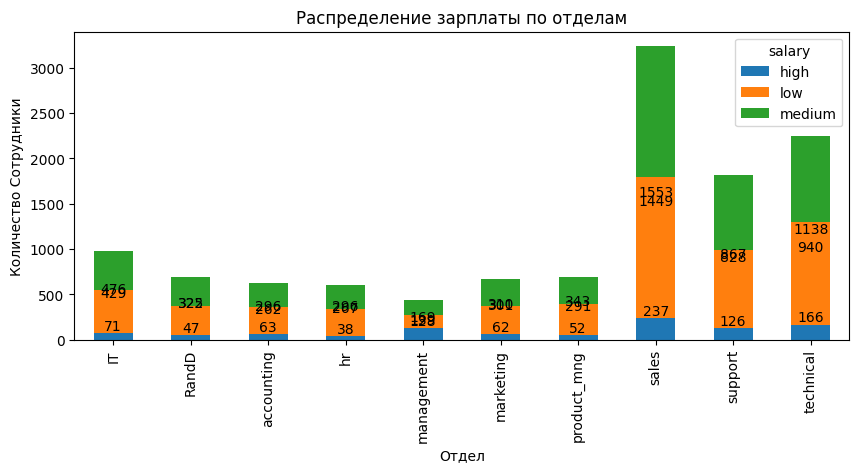

In [95]:
# визуализируем полученные данные
plt.figure(figsize=(9, 6))
data = df_salary.plot(kind='bar', stacked=True, figsize=(10, 4))

plt.title('Распределение зарплаты по отделам')
plt.ylabel('Количество Сотрудники')
plt.xlabel('Отдел')

for p in data.patches:
    data.annotate(int(p.get_height()),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center',
                  va='bottom')

plt.xticks(rotation=90)
plt.show()

##### Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [96]:
import scipy.stats as st
import numpy as np

In [99]:
# группируем зарплаты сотрудников
salary_low = df[df['salary'] == 'low']['average_montly_hours']
salary_high = df[df['salary'] == 'high']['average_montly_hours']
salary = np.concatenate((salary_low, salary_high))  #Выборка

print('Среднее количество рабочих часов сотрудников c низким окладом',
      salary_low.mean().round(2))
print('Среднее количество рабочих часов сотрудников с высоким окладом',
      salary_low.mean().round(2))

Среднее количество рабочих часов сотрудников c низким окладом 200.44
Среднее количество рабочих часов сотрудников с высоким окладом 200.44


Гипотеза   
H0 - в среднем проведенное на работе время одинаково для всех работников

In [101]:
from scipy import stats

result = stats.ttest_ind(salary_low, salary_high, equal_var=False)
a = 0.05

if (result.pvalue < a):
    print('Результат: Отвергаем нулевую гипотезу')
else:
    print('Результат: Не отвергаем нулевую гипотезу')

Результат: Не отвергаем нулевую гипотезу


##### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет   
- Средняя степень удовлетворенности   
- Среднее количество проектов   

In [102]:
workers = df[(df['left'] == 0)]
retireds = df[(df['left'] == 1)]

In [103]:
indicators = pd.DataFrame()
rows = []

rows.append({
    'Показатель':
    'Доля получивших повышение за последние 5 лет',
    'Уволившиеся':
    round(retireds.promotion_last_5years.value_counts(normalize=True)[1], 3),
    'Действующие':
    round(workers.promotion_last_5years.value_counts(normalize=True)[1], 3)
})

rows.append({
    'Показатель': 'Средняя степень удовлетворенности',
    'Уволившиеся': round(retireds.satisfaction_level.mean(), 3),
    'Действующие': round(workers.satisfaction_level.mean(), 3)
})

rows.append({
    'Показатель': 'Среднее количество проектов',
    'Уволившиеся': round(retireds.number_project.mean(), 3),
    'Действующие': round(workers.number_project.mean(), 3)
})

for row in rows:
    indicators = pd.concat([indicators, pd.DataFrame([row])])

indicators

,Показатель,Уволившиеся,Действующие
0,Доля получивших повышение за последние 5 лет,0.004,0.020
0,Средняя степень удовлетворенности,0.440,0.667
0,Среднее количество проектов,3.883,3.787


##### Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [104]:
X = df.iloc[:,[0,1,2,3,4,5,7]]
y = df['left']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=39)  

In [106]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [107]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
model.score(X_test, y_test).round(2)

0.84

Модель получилась хорошая, коэффициент детерминации равен 0.83

In [110]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test)).round(2)

0.84

Точность модели высокая

##### Загрузить jupyter notebook с решением на github и прислать ссылку

Github
https://github.com/Konstantin-39/Netology/blob/main/Final_work.ipynb